# Fuel Consumption - Regresión Simple

Se tiene la tarea de asignar un modelo para predecir el impacto del aumento de potencia de fuerza del vehículo (HP) en la economía del combustible (Millas por galón).

- Variable independiente X: Caballos de fuerza del vehículo (HP)
- Variable dependiente Y: Millas por galon (MPG)

## Paso 1: Importación de librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Paso 2: Importación de dataset

In [4]:
fuel_economy_df = pd.read_csv('FuelEconomy.csv')
fuel_economy_df.head() 

,Horse Power,Fuel Economy (MPG)
0,118.770799,29.344195
1,176.326567,24.695934
2,219.262465,23.952010
3,187.310009,23.384546
4,218.594340,23.426739


In [6]:
fuel_economy_df.describe()

,Horse Power,Fuel Economy (MPG)
count,100.000000,100.000000
mean,213.676190,23.178501
std,62.061726,4.701666
min,50.000000,10.000000
25%,174.996514,20.439516
50%,218.928402,23.143192
75%,251.706476,26.089933
max,350.000000,35.000000


In [7]:
fuel_economy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Horse Power         100 non-null    float64
 1   Fuel Economy (MPG)  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


## Paso 3: Visualización de Dataset

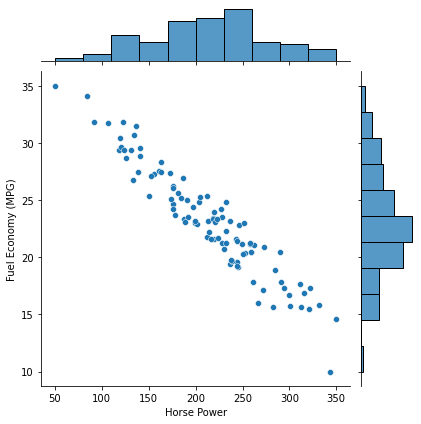

In [9]:
sns.jointplot(x='Horse Power', y='Fuel Economy (MPG)', data=fuel_economy_df);

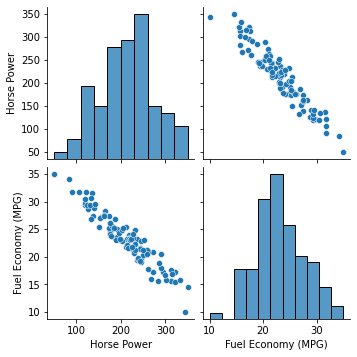

In [10]:
sns.pairplot(fuel_economy_df);

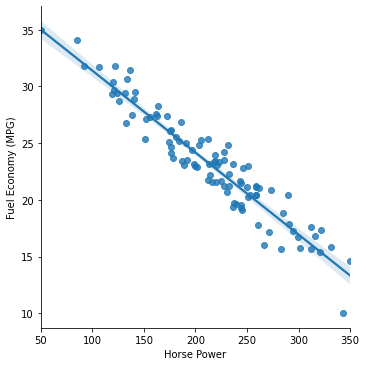

In [13]:
sns.lmplot(x='Horse Power', y='Fuel Economy (MPG)', data=fuel_economy_df);

## Step 4: Creando testing y training dataset

In [25]:
X = fuel_economy_df[['Horse Power']]
y = fuel_economy_df['Fuel Economy (MPG)']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

In [28]:
print('X_train.shape: ',X_train.shape)
print('X_test.shape: ',X_test.shape)
print('y_train.shape: ',y_train.shape)
print('y_test.shape: ',y_test.shape)

X_train.shape:  (80, 1)
X_test.shape:  (20, 1)
y_train.shape:  (80,)
y_test.shape:  (20,)


## Step 5: Train the Model

In [31]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train, y_train)

LinearRegression()

In [32]:
print('Coeficiente: ', regressor.coef_)
print('Interceptor: ', regressor.intercept_)

Coeficiente:  [-0.07275239]
Interceptor:  38.67201780123498


## Step 6: Test the model

In [35]:
y_predict = regressor.predict(X_test)
y_predict

array([19.62165031, 29.48986499, 15.25733307, 17.25182799, 28.75539721,
       16.88046036, 22.12956974, 25.69078732, 27.5883467 , 27.36517797,
       17.94278085, 20.7879951 , 15.32203864, 25.87937487, 26.11177838,
       28.41685491, 22.43516435, 18.11188273, 22.35059485, 24.18355066])

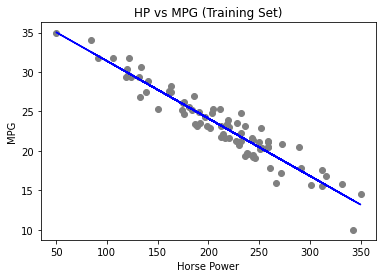

In [37]:
plt.scatter(X_train, y_train, color='gray')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.xlabel('Horse Power')
plt.ylabel('MPG')
plt.title('HP vs MPG (Training Set)');

## Step 7: Prediciendo nuevos valores

In [41]:
HP = [[150],[100]]
MPG = regressor.predict(HP)
MPG

array([27.75915892, 31.39677855])